# Iris Flower Classiffication

# Problem Statement
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

# Understand the problem statement
As a Data Scientist,We all of us have the indepth knowledge of Iris Dataset.The Data Set contains 3 classes of 50 instances of each,where each class refers to species of iris flower.The main objective of the problem statement is to build a classifier model by using advance data science techniques.Here I am trying play with different algorithms and its parameters to maximize the accuracy of model.

# Load required  libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df=pd.read_csv('C:/Users/Devi/Downloads/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Remove unnecessary feat from dataset Id
df.drop('Id',axis=1,inplace=True)

In [6]:
#see the descriptive statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#check propertise like shape
df.shape

(150, 5)

In [8]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


# DATA VISUALIZATION

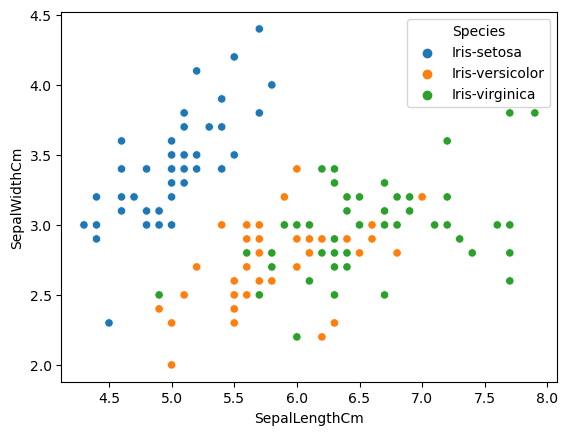

In [9]:
#scatter plot
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.show()

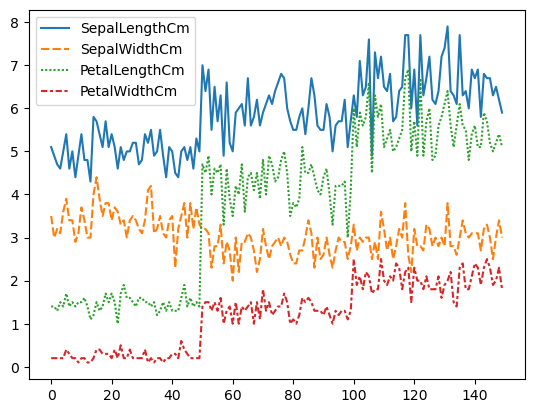

In [10]:
#line plot
sns.lineplot(data=df.drop(['Species'], axis=1))
plt.show()

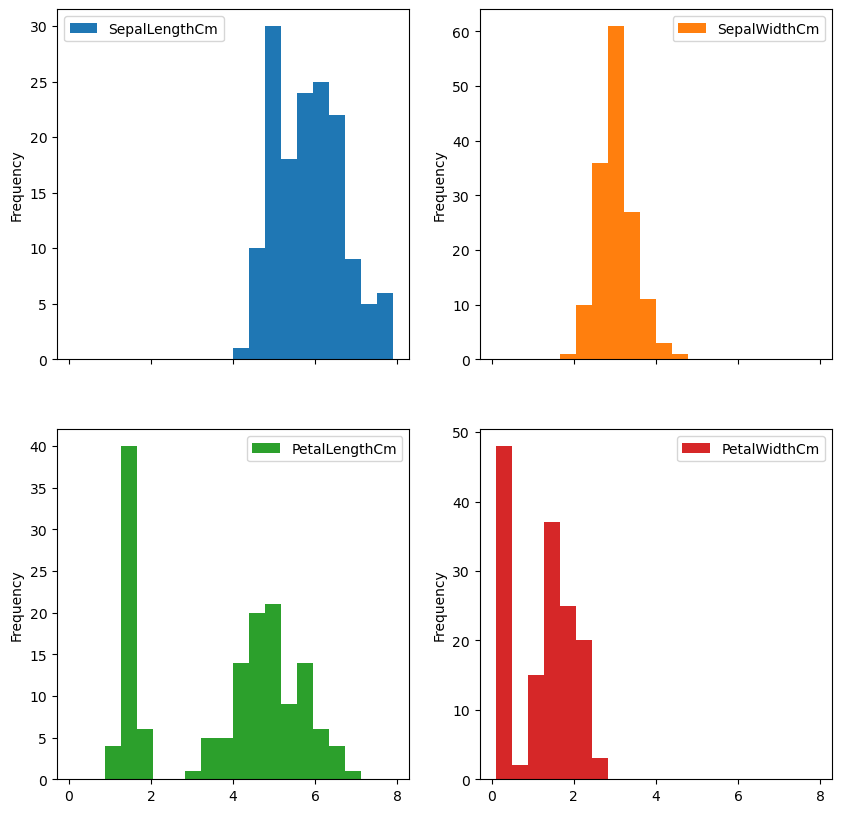

In [11]:
#Hist plot
df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()

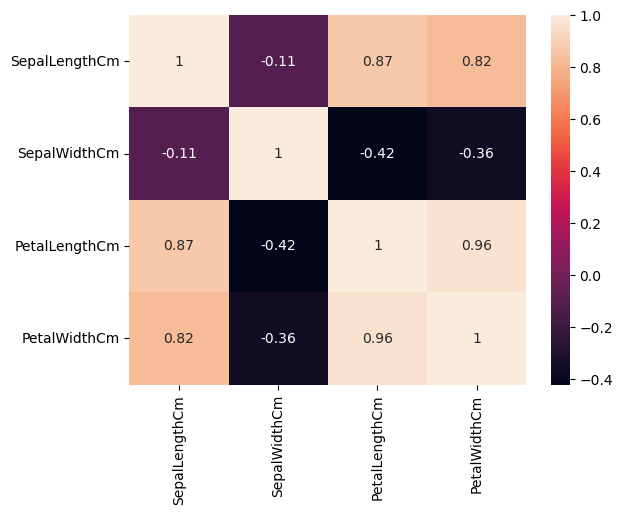

In [12]:
#HEatmap and correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

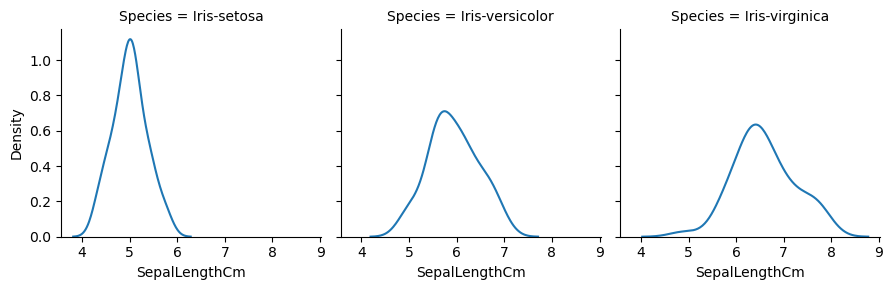

In [13]:
g = sns.FacetGrid(df, col='Species')
g = g.map(sns.kdeplot, 'SepalLengthCm')

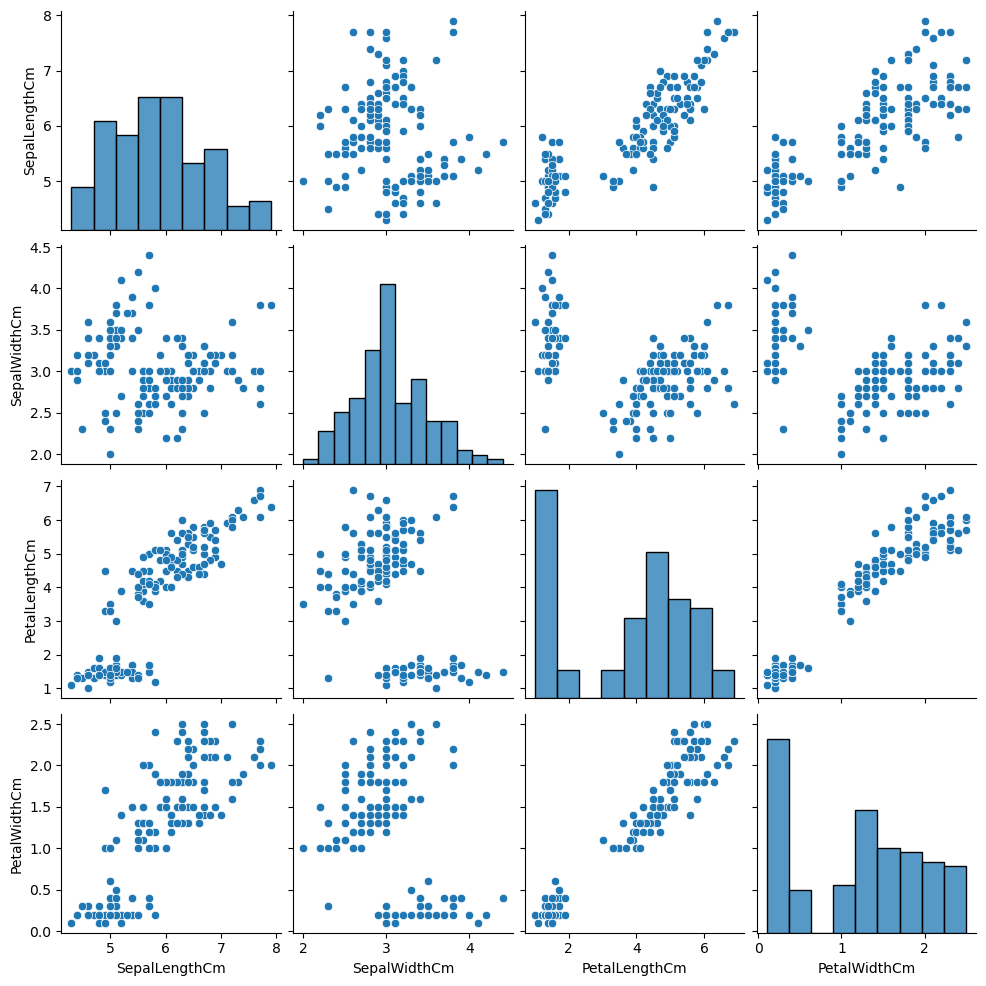

In [14]:
#Pairplot
sns.pairplot(df)

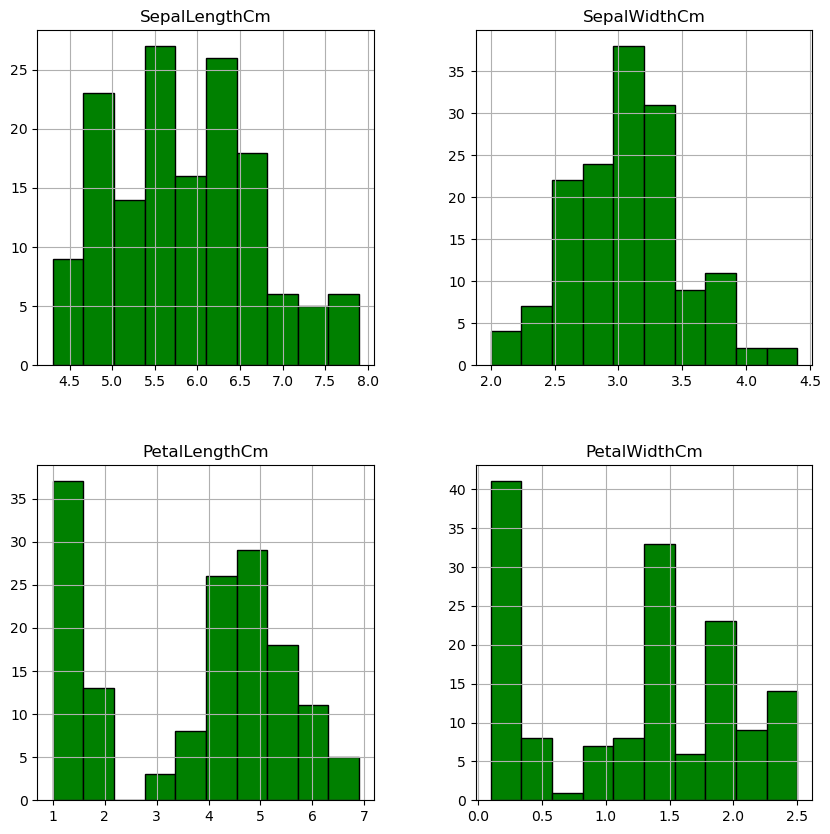

In [15]:
df.hist(color= 'green' ,edgecolor='black',figsize=(10,10))
plt.show()

In [16]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')#.set_precision(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Machine Learning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [18]:
x = df.drop('Species', axis=1)
y= df.Species
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
y_test

82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
57     Iris-versicolor
1          Iris-setosa
70     Iris-versicolor
25         Iris-setosa
84     Iris-versicolor
66     Iris-versicolor
133     Iris-virginica
102     Iris-virginica
107     Iris-virginica
26         Iris-setosa
23         Iris-setosa
123     Iris-virginica
130     Iris-virginica
21         Iris-setosa
12         Iris-setosa
71     Iris-versicolor
128     Iris-virginica
48         Iris-setosa
72     Iris-versicolor
88     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
39         Iris-setosa
53     Iris-versicolor
79     Iris-versicolor
10         Iris-setosa
50     Iris-versicolor
49         Iris-setosa
43         Iris-setosa
135     Iris-virginica
40         Iris-setosa
115     Iris-virginica
142     Iris-virginica
69     Iris-versicolor
17         Iris-setosa
46         

# K Neighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9666666666666667

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


# SVM

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9833333333333333

# DECISION TREE CLASSIFIER

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.9333333333333333

# Observations:

Using Petals over Sepal for training the data gives a much better accuracy. This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

In above experiment,we have seen different accuracy with respect to different models like Logistic Regression,Decision Tree,SVM,K Neighbors Classifier among all of them KNN provide best accuracy for the small dataset.So I will consider KNN as my final model having train and test are 98%.